# Python Básico, Librerias y Modelamiento Básico

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Coordenadas Polares
Supongamos que la posición de un punto en el espacio bidimensional se nos da en coordenadas polares $r, \theta $ y queremos convertirlo a coordenadas cartesianas $ x, y$. ¿Cómo escribiríamos un programa para hacer esto? Los pasos adecuados son:

- Pedir al usuario que ingrese los valores de \( r \) y \( \theta \).

 - Convertir esos valores a coordenadas cartesianas usando las fórmulas estándar:
$$   

x = r \cos \theta, \quad y = r \sin \theta. 
$$

- Imprimir los resultados.
- Escriba un programa que realice la operación inversa. Es decir, solicita al usuario las coordenadas cartesianas $x, y$ de un punto en el espacio bidimensional, calcula e imprime las correspondientes coordenadas polares, con el ángulo $\theta$ dado en grados

In [2]:
# Pedir al usuario los valores de r y theta (en grados)
r = float(input("Ingrese el valor de r (radio): "))
theta_deg = float(input("Ingrese el valor de θ (ángulo en grados): "))

# Convertir el ángulo a radianes
theta_rad = theta_deg*np.pi/180

# Calcular x e y
x = r * np.cos(theta_rad)
y = r * np.sin(theta_rad)

# Imprimir los resultados
print(f"Coordenadas cartesianas: x = {x:.2f}, y = {y:.2f}")

Coordenadas cartesianas: x = 1.00, y = 0.00


In [3]:
# Pedir al usuario los valores de x e y
x = float(input("Ingrese el valor de x: "))
y = float(input("Ingrese el valor de y: "))

# Calcular r y theta (en radianes primero)
r = np.sqrt(x**2 + y**2)
theta_rad = np.atan2(y, x)  # Usamos atan2 para manejar todos los cuadrantes

# Convertir theta a grados
theta_deg = theta_rad*180/np.pi

# Imprimir los resultados
print(f"Coordenadas polares: r = {r:.2f}, θ = {theta_deg:.2f}°")

Coordenadas polares: r = 2.83, θ = 45.00°


## Números de Catalan
Los números de Catalan $C_n$ son una secuencia de enteros 1, 1, 2, 5, 14, 42, 132... que juegan un papel importante en mecánica cuántica y en la teoría de sistemas desordenados. (Fueron fundamentales en la demostración de Eugene Wigner de la llamada ley del semicírculo). Estos números vienen dados por:

$$C_0 = 1, \quad C_{n+1} = \frac{4n + 2}{n + 2} \, C_n.$$

Escribe un programa que imprima en orden creciente todos los números de Catalan menores o iguales a mil millones.

In [4]:
def catalan_numbers_up_to_limit(limit):
    n = 0
    C = 1  # C_0 = 1
    print(f"C_{n} = {C}")
    
    while True:
        next_C = C * (4 * n + 2) // (n + 2)
        if next_C > limit:
            break
        n += 1
        C = next_C
        print(f"C_{n} = {C}")

# Llamar a la función con el límite de mil millones (1,000,000,000)
catalan_numbers_up_to_limit(1e9)

C_0 = 1
C_1 = 1
C_2 = 2
C_3 = 5
C_4 = 14
C_5 = 42
C_6 = 132
C_7 = 429
C_8 = 1430
C_9 = 4862
C_10 = 16796
C_11 = 58786
C_12 = 208012
C_13 = 742900
C_14 = 2674440
C_15 = 9694845
C_16 = 35357670
C_17 = 129644790
C_18 = 477638700


## Satélite en órbita circular
Un satélite será lanzado a una órbita circular alrededor de la Tierra de modo que orbite el planeta una vez cada $T$ segundos, la altitud $h$ sobre la superficie terrestre que debe tener el satélite es:

$$h = \left( \frac{GMT^2}{4\pi^2} \right)^{1/3} - R,$$

donde $G = 6.67 \times 10^{-11} \, \text{m}^3 \, \text{kg}^{-1} \, \text{s}^{-2}$ es la constante gravitacional de Newton, $M = 5.97 \times 10^{24} \, \text{kg}$ es la masa de la Tierra y $R = 6371 \, \text{km}$ es su radio.


- Escriba un programa que solicite al usuario ingresar el valor deseado de $T$ y luego calcule e imprima la altitud correcta en metros.

- Usa tu programa para calcular las altitudes de satélites que orbitan la Tierra:
    - Una vez al día (órbita "geosíncrona"),
    - Cada 90 minutos.

In [5]:
# Constantes
G = 6.67e-11       # Constante gravitacional (m³ kg⁻¹ s⁻²)
M = 5.97e24        # Masa de la Tierra (kg)
R = 6371 * 1000    # Radio terrestre (m)

# Función para calcular la altitud h dado el período T (en segundos)
def calcular_altitud(T):
    h = ( (G * M * T**2) / (4 * np.pi**2) ) ** (1/3) - R
    return h

# Solicitar al usuario el período T (en segundos)
#T = float(input("Ingrese el período orbital T (en segundos): "))
T=6000
h = calcular_altitud(T)
print(f"La altitud del satélite es: {h:.2f} metros")

# Casos particulares (ejemplos adicionales)
print("\n--- Ejemplos adicionales ---")

# 1. Órbita geosíncrona (T = 1 día = 86400 s)
T_geo = 86400
h_geo = calcular_altitud(T_geo)
print(f"Órbita geosíncrona (T = 1 día): {h_geo:.2f} metros (~{h_geo/1000:.2f} km)")

# 2. Órbita de 90 minutos (T = 5400 s)
T_90min = 90 * 60
h_90min = calcular_altitud(T_90min)
print(f"Órbita de 90 minutos: {h_90min:.2f} metros (~{h_90min/1000:.2f} km)")


La altitud del satélite es: 763238.82 metros

--- Ejemplos adicionales ---
Órbita geosíncrona (T = 1 día): 35855910.18 metros (~35855.91 km)
Órbita de 90 minutos: 279321.63 metros (~279.32 km)


## Grafica de funciones en el plano $xy$
Graficar las funciones $y_1(x) = 3 + e^{-x} \sin(6x)$ y $y_2(x) = 4 + e^{-x} \cos(6x)$ para $0 \leq x \leq 5$ en un mismo sistema de ejes. La gráfica debe incluir:


- Etiquetas para los ejes
- Un título
- Una leyenda

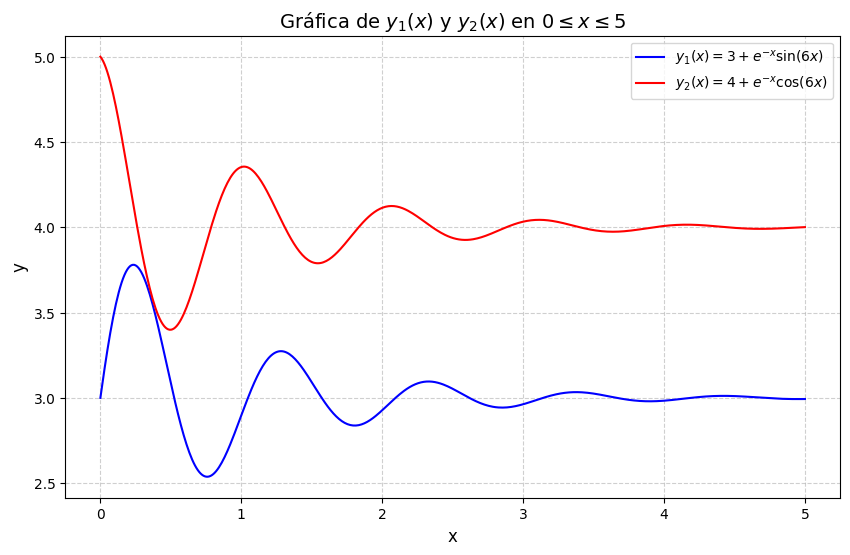

In [6]:
# Definir el rango de x
x = np.linspace(0, 5, 500)  # 500 puntos entre 0 y 5

# Definir las funciones y1(x) y y2(x)
y1 = 3 + np.exp(-x) * np.sin(6 * x)
y2 = 4 + np.exp(-x) * np.cos(6 * x)

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

# Graficar ambas funciones
plt.plot(x, y1, label=r'$y_1(x) = 3 + e^{-x} \sin(6x)$', color='blue')
plt.plot(x, y2, label=r'$y_2(x) = 4 + e^{-x} \cos(6x)$', color='red')

# Añadir etiquetas y título
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title(r'Gráfica de $y_1(x)$ y $y_2(x)$ en $0 \leq x \leq 5$', fontsize=14)

# Añadir una leyenda
plt.legend(fontsize=10)

# Mostrar la cuadrícula para mejor visualización
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar la gráfica
plt.show()

## Grafica de funciones en el plano $r \theta$
Aunque la función de graficación está diseñada principalmente para gráficos estándar $xy$, puede adaptarse para otros tipos de gráficas.

- Graficar la curva llamada **deltoide**, definida paramétricamente por las ecuaciones:
    $$
    x = 2 \cos \theta + \cos 2\theta, \quad y = 2 \sin \theta - \sin 2\theta,
    $$
    donde $0 \leq \theta < 2\pi$. Tomar un conjunto de valores de $\theta$ entre cero y $2\pi$, calcular $x$ e $y$ para cada uno usando las ecuaciones anteriores, y luego graficar $y$ como función de $x$.

- Para hacer una gráfica polar $r = f(\theta)$, se puede calcular $r$ para un rango de valores de $\theta$ y luego convertir $r$ y $\theta$ a coordenadas cartesianas usando las ecuaciones estándar $x = r \cos \theta$, $y = r \sin \theta$. Usar este método para graficar la espiral de Galileo $r = \theta^2$ para $0 \leq \theta \leq 10\pi$.

- Usando el mismo método, hacer una gráfica polar de la "función de Fey":
    $$
    r = e^{\cos \theta} - 2 \cos 4\theta + \sin^5 \left(\frac{\theta}{12}\right)
    $$
    en el rango $0 \leq \theta \leq 24\pi$.

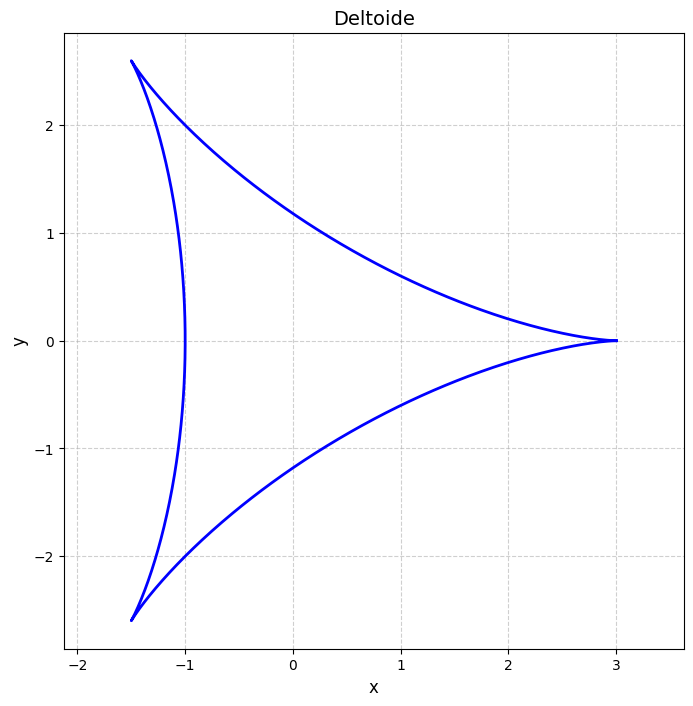

In [7]:
theta = np.linspace(0, 2*np.pi, 1000)
x = 2 * np.cos(theta) + np.cos(2 * theta)
y = 2 * np.sin(theta) - np.sin(2 * theta)

plt.figure(figsize=(8, 8))
plt.plot(x, y, color='blue', linewidth=2)
plt.title("Deltoide", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.axis('equal')  # Misma escala en ejes x e y
plt.show()

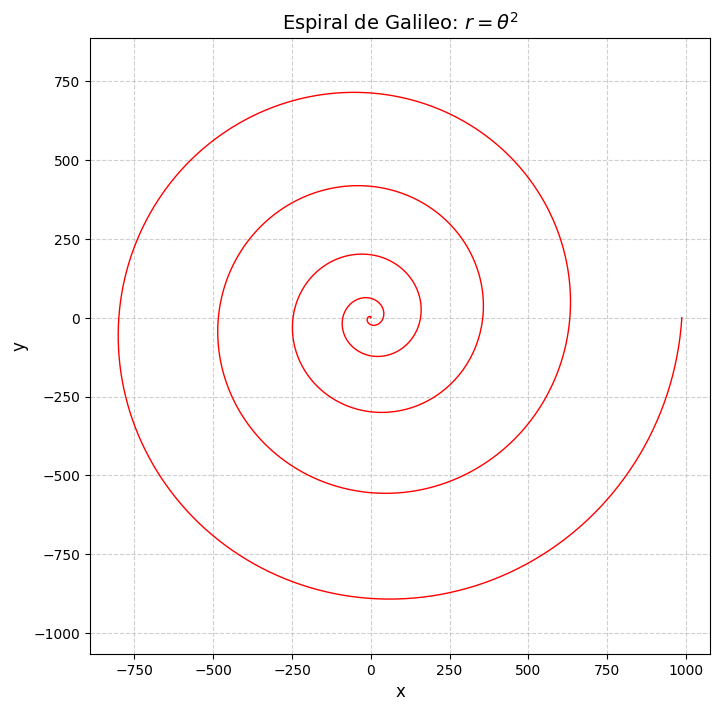

In [8]:
theta = np.linspace(0, 10*np.pi, 1000)
r = theta**2
x = r * np.cos(theta)
y = r * np.sin(theta)

plt.figure(figsize=(8, 8))
plt.plot(x, y, color='red', linewidth=1)
plt.title("Espiral de Galileo: $r = \\theta^2$", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.axis('equal')
plt.show()

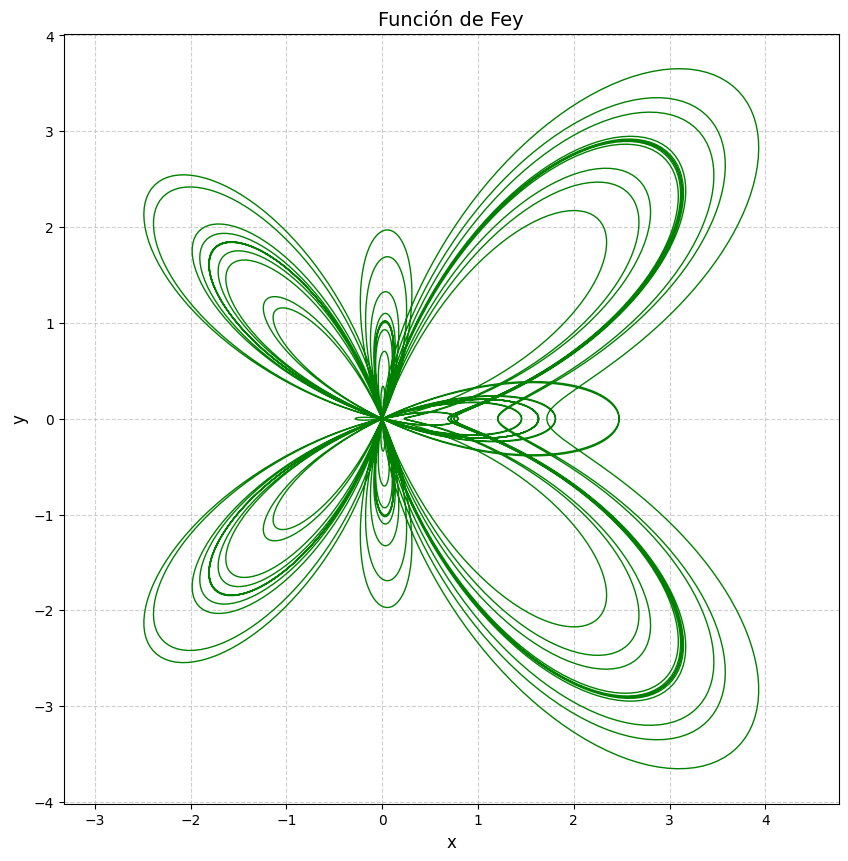

In [9]:
theta = np.linspace(0, 24*np.pi, 5000)
r = np.exp(np.cos(theta)) - 2 * np.cos(4 * theta) + np.sin(theta / 12)**5
x = r * np.cos(theta)
y = r * np.sin(theta)

plt.figure(figsize=(10, 10))
plt.plot(x, y, color='green', linewidth=1)
plt.title("Función de Fey", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.axis('equal')
plt.show()

## Grafica Caída Libre.
Se lanza una pelota hacia arriba con velocidad inicial $v_0 = 5\,\text{m/s}$ desde una altura inicial $y_0 = 3\,\text{m}$. Escribir un programa en Python para graficar $y(t)$ desde $t = 0$ hasta que la pelota impacta el suelo. Recuerde que

$$
y(t)=y_0+v_0 t -\frac{1}{2}gt^2
$$ 

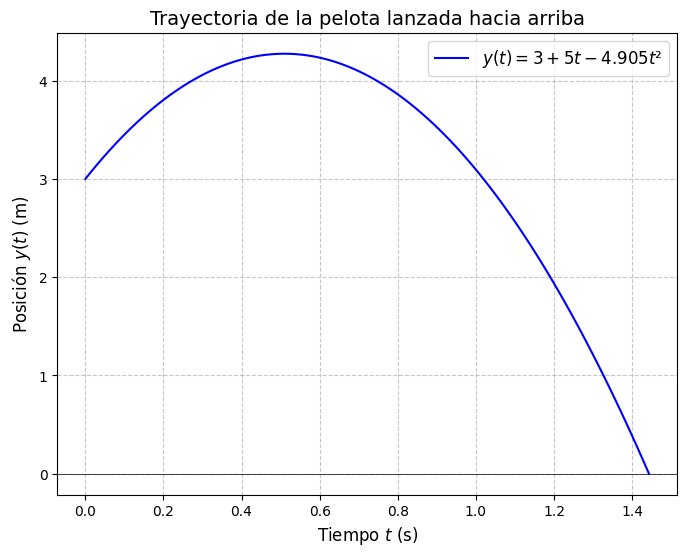

In [10]:
# Parámetros iniciales
v0 = 5  # Velocidad inicial en m/s
y0 = 3  # Altura inicial en m
g = 9.81  # Aceleración debida a la gravedad en m/s²

# Función para calcular la posición y(t)
def y(t):
    return y0 + v0 * t - 0.5 * g * t**2

# Encontrar el tiempo de impacto (cuando y(t) = 0)
# Resolver la ecuación cuadrática: 0 = y0 + v0*t - 0.5*g*t²
# Esto es: 0.5*g*t² - v0*t - y0 = 0
a = 0.5 * g
b = -v0
c = -y0

# Calcular las raíces de la ecuación cuadrática
discriminante = b**2 - 4 * a * c
t_impacto = (-b + np.sqrt(discriminante)) / (2 * a)  # Tomamos la raíz positiva

# Crear un array de tiempos desde 0 hasta t_impacto
t = np.linspace(0, t_impacto, 100)

# Calcular las posiciones correspondientes
y_t = y(t)

# Graficar
plt.figure(figsize=(8, 6))
plt.plot(t, y_t, label=f'$y(t) = {y0} + {v0}t - 4.905t²$', color='blue')
plt.xlabel('Tiempo $t$ (s)', fontsize=12)
plt.ylabel('Posición $y(t)$ (m)', fontsize=12)
plt.title('Trayectoria de la pelota lanzada hacia arriba', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(0, color='black', linewidth=0.5)  # Línea en y=0 (suelo)
plt.legend(fontsize=12)
plt.show()